# Clustering
There are various types of clustering algorithms, such as 
partitioning, hierarchical, or density-based clustering. 

###k-Means is a type of partitioning clustering.

# K-Means Clustering Algorithm

### Theory
1. k-means help you identify cluster.

2. k-means is free parameter wherein before startting the algo you have  to tell the algo that what is the value of k.

3. For eg. 

   let k = 2
   
    step 1: Identify two random points which we have to consider centre of those two clusters(also called centroids).

    step2: Identify the distance of each of these data points from these centroids.Draw lines for simple mathematical calculation.

    step3: Adjust centroids so that they become center of gravity for given cluster.

    step4: Again re-cluster every point based on their distance with centroid.

    step5: Again adjust centroids.

    step6: Recompute clusters and repeat this till data points stop changing clusters.

4. Which k to start with? We have a technique called Elbow method.

5. Inc no of cluster;less error.

![](pic2.jpeg)

### Code

# STEP 1 DATA PRE-PROCESSING

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [30]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [31]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [32]:
# checking for missing values
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

# STEP 2 Finding the optimal number of clusters using the elbow method

In [33]:
# clean data
# Using the inplace=True keyword in a pandas method changes the default behaviour 
# such that the operation on the dataframe doesn't return anything, it instead 'modifies the underlying data' 
dataset.drop_duplicates(inplace=True)


In [34]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values #row vector of the last column's values

##### within clusters sum of squares

In [35]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = [] # WCSS is the sum of squared distance between each point and the centroid in a cluster.WCSS value is largest when K = 1.
#  It will be used to store the sum of squared distances between each data point and the centroid of its assigned cluster for different values of k (the number of clusters).

# Sum of Squared Error (SSE)
# SSE is calculated as the mean distance between data points and their cluster centroid.
for i in range(1, 11): # values from 1 to 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    # inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.
    wcss.append(kmeans.inertia_)

c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

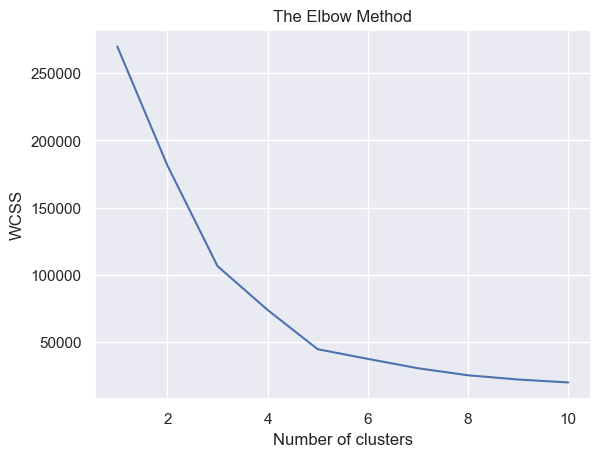

In [36]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shahd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters - 0, 1, 2, 3, 4

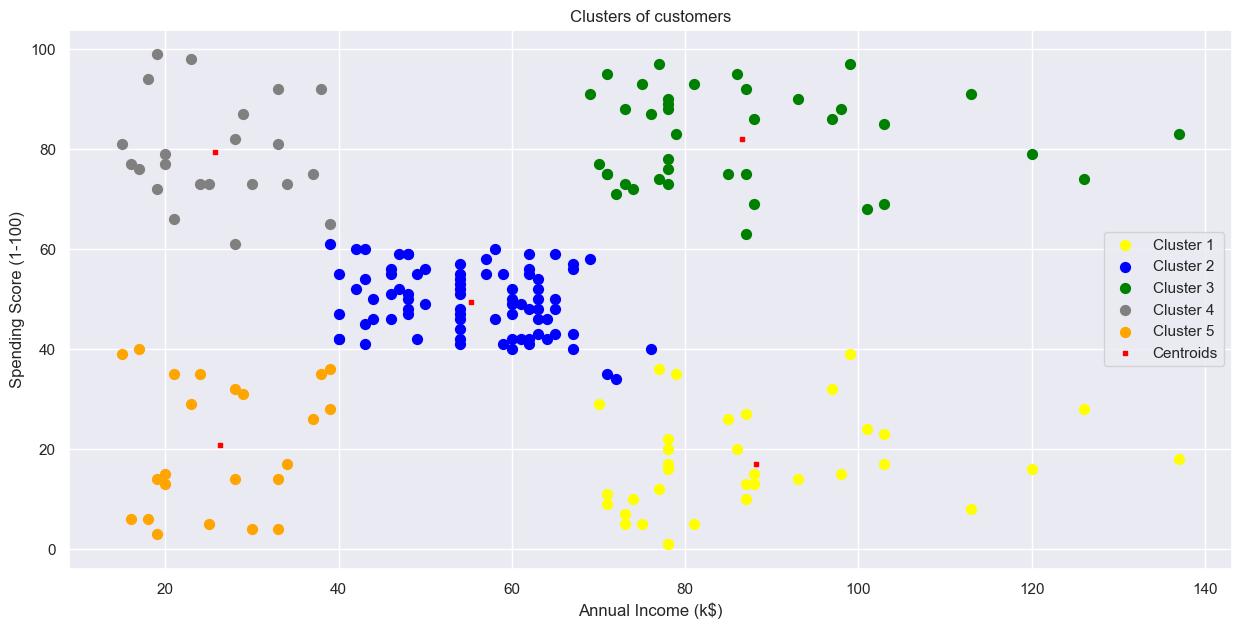

In [42]:
# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=10,marker=',')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()